<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/python_data_analysis_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 라이브러리를 활용한 데이터 분석 2판 . 데이터 분석 예제 

### 1. Bit.ly의 1.USA.goc 데이터 
: url 축약서비스 사용자들에 대한 익명 정보

In [ ]:
path = '/content/drive/MyDrive/pydata-book/datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [ ]:
import json
records = [json.loads(line) for line in open(path)]

In [ ]:
records[0] # 레코드 별 정보를 나타내는 딕셔너리 리스트 

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

이 데이터에서 가장 빈도가 높은 표준 시간대를 구한다 .

In [ ]:
# 표준 시간대 리스트 
time_zone = [rec['tz'] for rec in records]
# 레코드 행 전체가 모두 tz 값을 가지고 있지 않음 

KeyError: ignored

In [ ]:
time_zone = [rec['tz'] for rec in records if 'tz' in rec]
time_zone[:10] # 시간대의 리스트들 

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [ ]:
# 개수세기 
from collections import Counter
Counter(time_zone)

Counter({'': 521,
         'Africa/Cairo': 3,
         'Africa/Casablanca': 1,
         'Africa/Ceuta': 2,
         'Africa/Johannesburg': 1,
         'Africa/Lusaka': 1,
         'America/Anchorage': 5,
         'America/Argentina/Buenos_Aires': 1,
         'America/Argentina/Cordoba': 1,
         'America/Argentina/Mendoza': 1,
         'America/Bogota': 3,
         'America/Caracas': 1,
         'America/Chicago': 400,
         'America/Chihuahua': 2,
         'America/Costa_Rica': 1,
         'America/Denver': 191,
         'America/Edmonton': 6,
         'America/Guayaquil': 2,
         'America/Halifax': 4,
         'America/Indianapolis': 20,
         'America/La_Paz': 1,
         'America/Lima': 1,
         'America/Los_Angeles': 382,
         'America/Managua': 3,
         'America/Mazatlan': 1,
         'America/Mexico_City': 15,
         'America/Monterrey': 1,
         'America/Montevideo': 1,
         'America/Montreal': 9,
         'America/New_York': 1251,
         'Amer

In [ ]:
# 가장 많이 등장하는 상위 10 
Counter(time_zone).most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

* pandas 활용 

In [ ]:
import pandas as pd 
frame = pd.DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [ ]:
frame.info()
# 3560 레코드 ,18 변수 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [ ]:
frame['tz'].isnull().sum()  #120개의 누락 데이터 ! 

120

In [ ]:
# 누락데이터를 missing으로 대체 
clean_tz = frame['tz'].fillna('Missing')

In [ ]:
# 비어있는 값도 있을 것 
clean_tz.replace(' ', 'Unknown', inplace = True)
tz_counts = clean_tz.value_counts()
tz_counts[:10] # Series

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [ ]:
# top 10
frame['tz'].value_counts().head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

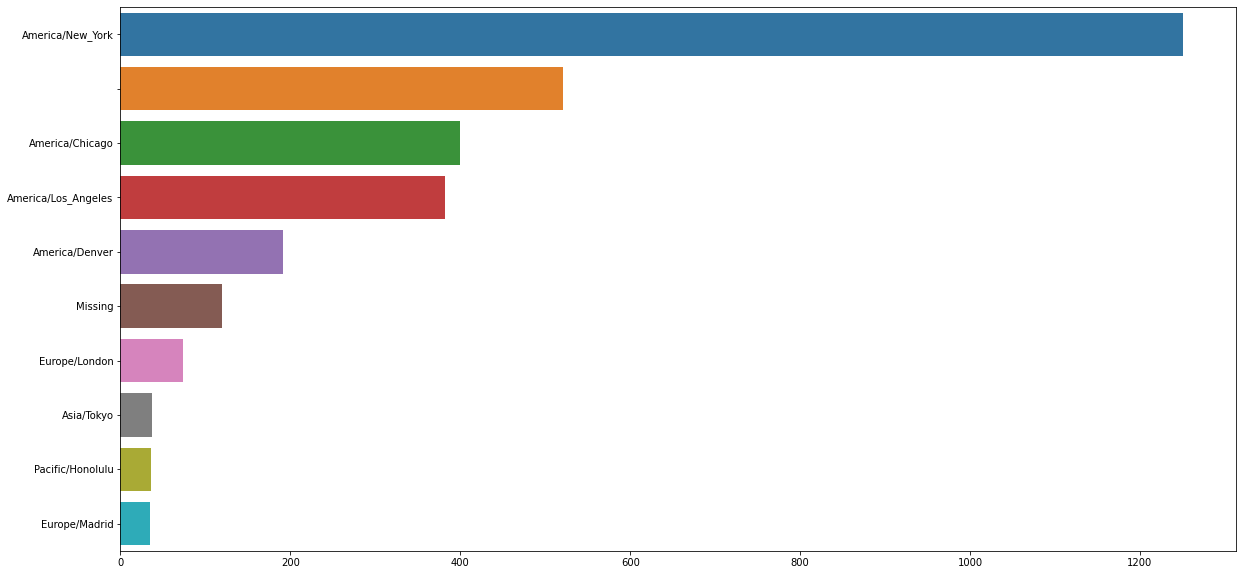

In [ ]:
# 시각화 막대그래프 수평 
import matplotlib.pyplot as plt
import seaborn as sns 
subset= tz_counts[:10]
fig = plt.figure(figsize =(20,10))
sns.barplot(x = subset.values , y = subset.index ) # 수평 막대 : X, Y 값을 바꿈 

* a 필드에는 URL 단축을 실행하는 브라우저 , 단말기 , 어플리케이션 에 대한 정보가 들어있음

In [ ]:
frame['a'][1]     # 구글 맵스

'GoogleMaps/RochesterNY'

In [ ]:
frame['a'][5]   # 모질라

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [ ]:
# agent 변수에서 브라우저 정보만을 추출함 . 
results = pd.Series([x.split()[0] for x in frame['a'].dropna() ]) # 결측치는 제외 

In [ ]:
results[:10] # 앞 10행 

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

In [ ]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

* 윈도우 사용자와 비윈도우 사용자 그룹으로 나누기   
agent 값에서 Windows 포함되면 window사용자 

In [ ]:
cframe = frame[frame.a.notnull()] # a 결측치는 제외한 df 

In [ ]:
import numpy as np
# os 열 추가 : agent열 값중 windows 포함 -> windows / F : Not windows
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cframe['os'].value_counts()

Windows        2246
Not Windows    1194
Name: os, dtype: int64

* 표준 시간대별, 운영체제별 그룹 

In [ ]:
by_tz_os = cframe.groupby(['tz', 'os'])

by_tz_os.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [ ]:
# unstack함수로 os를 변수로 삼음 df 
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head(10)

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


* 전체 표준시간대의 순위 

In [ ]:
# 오름차순으로 정렬. 
indexer = agg_counts.sum(1).argsort()#행 방향 합
indexer.head(10)

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [ ]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [ ]:
agg_counts.sum(1).nlargest(10)


tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [ ]:
# 중첩 막대그래프 
count_subset = count_subset.stack() # 다시 멀티 인덱스 


AttributeError: ignored

In [ ]:
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [ ]:
count_subset.name = 'total'
df = count_subset.reset_index()
df

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


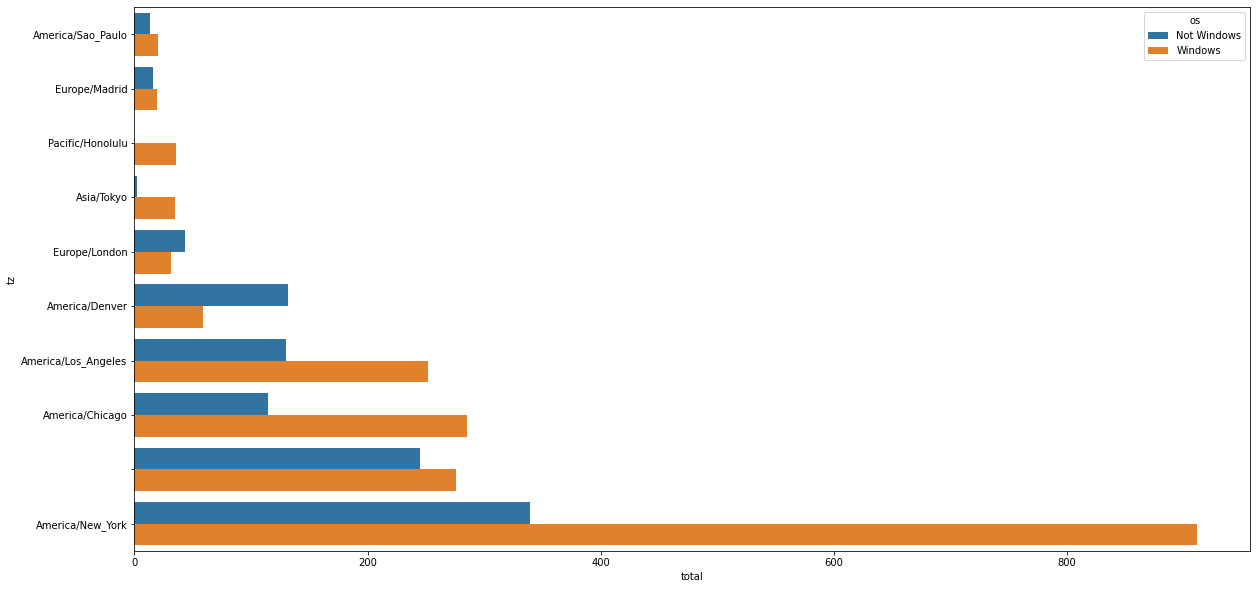

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = 'total',  y = 'tz', hue = 'os')

In [ ]:
# 정규화 후 그래프로 상대 비율 확인 (x / x.sum) 
def norm_total(group) :
  group['normed_total'] = group.total / group.total.sum() 
  return group

In [ ]:
results = df.groupby('tz').apply(norm_total)
results

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


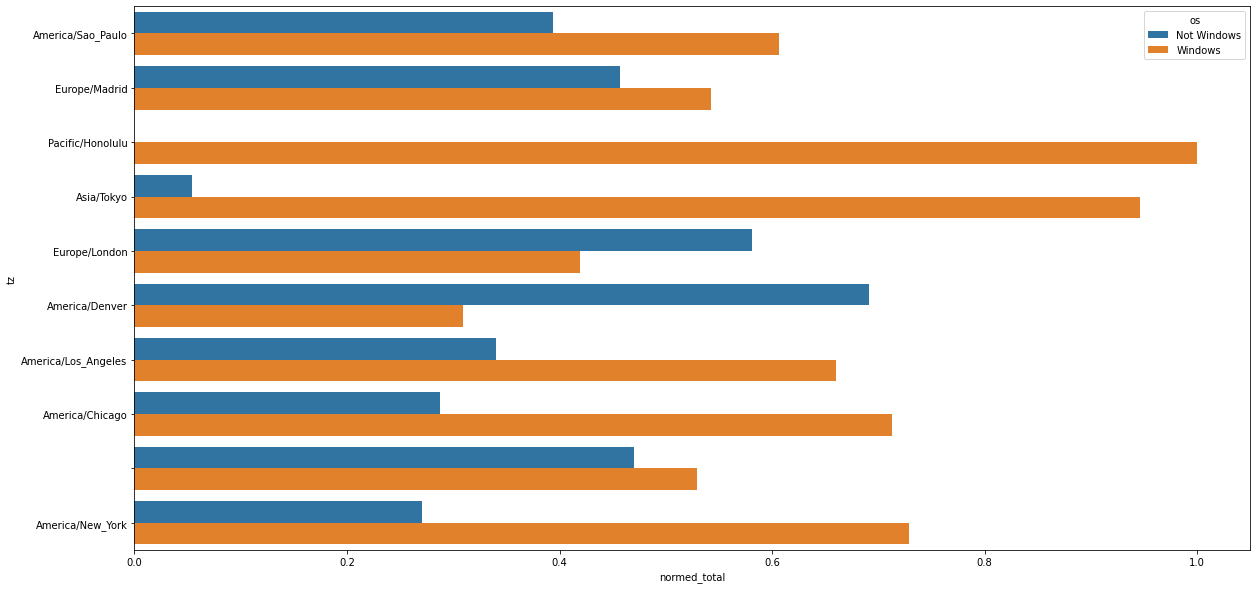

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(data = results, x = 'normed_total',  y = 'tz', hue = 'os')

In [ ]:
# transform method로 정규환
g = df.groupby('tz')
results2 = df.total / g.total.transform('sum')

In [ ]:
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64


### 2.  MovieLens의 영화 평점 데이터

In [1]:
# 데이터 호출 
import pandas as pd 
pd.options.display.max_rows = 10 
# 유저 정보 테이블 
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/content/drive/MyDrive/pydata-book/datasets/movielens/users.dat', sep='::',
                      header=None, names=unames)
# 평점 테이블 
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/content/drive/MyDrive/pydata-book/datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)
# 영화 정보 테이블
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/content/drive/MyDrive/pydata-book/datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies.head(
)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


* 테이블 결합작업이 필요  users & ratings , ratings & movies 키를 기준 결합 

In [7]:
data = pd.merge(pd.merge(users,ratings) , movies)
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [9]:
data.sort_values(by = 'user_id')
# 한명이 여러 영화를 감상한듯함 총 6040명의 유저 

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
28501,1,F,1,10,48067,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance
13819,1,F,1,10,48067,938,4,978301752,Gigi (1958),Musical
51327,1,F,1,10,48067,1207,4,978300719,To Kill a Mockingbird (1962),Drama
31152,1,F,1,10,48067,1721,4,978300055,Titanic (1997),Drama|Romance
...,...,...,...,...,...,...,...,...,...,...
578459,6040,M,25,6,11106,2641,2,956716343,Superman II (1980),Action|Adventure|Sci-Fi
338950,6040,M,25,6,11106,1947,4,997454036,West Side Story (1961),Musical|Romance
464888,6040,M,25,6,11106,904,4,956716845,Rear Window (1954),Mystery|Thriller
632232,6040,M,25,6,11106,2664,4,957717463,Invasion of the Body Snatchers (1956),Horror|Sci-Fi


In [16]:
# 회원 별 평균 평점 
data.groupby('user_id').mean()[['age', 'rating']]

,age,rating
user_id,,
1,1.0,4.188679
2,56.0,3.713178
3,25.0,3.901961
4,45.0,4.190476
5,25.0,3.146465
...,...,...
6036,25.0,3.302928
6037,45.0,3.717822
6038,56.0,3.800000


In [23]:
# 영화별 평균 평점 
data.groupby('title').mean()['rating'].sort_values(ascending = False)

title
Ulysses (Ulisse) (1954)                                       5.0
Lured (1947)                                                  5.0
Follow the Bitch (1998)                                       5.0
Bittersweet Motel (2000)                                      5.0
Song of Freedom (1936)                                        5.0
                                                             ... 
Fantastic Night, The (La Nuit Fantastique) (1949)             1.0
Cheetah (1989)                                                1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Mutters Courage (1995)                                        1.0
Windows (1980)                                                1.0
Name: rating, Length: 3706, dtype: float64

In [53]:
# 성별에 따른 각 영화의 평균 평점 
mean_ratings = pd.pivot_table(data , 
                              index = ('title','genres'),
                              columns = 'gender',
                              values = 'rating',
                              aggfunc = 'mean')
mean_ratings

,gender,F,M
title,genres,,
"$1,000,000 Duck (1971)",Children's|Comedy,3.375000,2.761905
'Night Mother (1986),Drama,3.388889,3.352941
'Til There Was You (1997),Drama|Romance,2.675676,2.733333
"'burbs, The (1989)",Comedy,2.793478,2.962085
...And Justice for All (1979),Drama|Thriller,3.828571,3.689024
...,...,...,...
"Zed & Two Noughts, A (1985)",Drama,3.500000,3.380952
Zero Effect (1998),Comedy|Thriller,3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),Action,NaN,3.500000


In [54]:
# 250건 이상의 평점 정보가 있는 영화만 추출
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [55]:
ratings_by_title[ratings_by_title >= 250]

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

In [29]:
# 평가수 250건 이상 영화 목록
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [30]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [32]:
# 성별 영화 평균 평점 df의 인덱스로 적용 
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [34]:
# 여자 평균 평점 높은순 
top_female_ratings = mean_ratings.sort_values(by ='F', ascending =False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [35]:
# 남자 평균 평점 높은순 
top_male_ratings = mean_ratings.sort_values(by ='M', ascending =False)
top_male_ratings

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
...,...,...
Speed 2: Cruise Control (1997),1.906667,1.863014
Superman IV: The Quest for Peace (1987),2.216216,1.847458
Super Mario Bros. (1993),2.163636,1.820339


* 남녀간 호불호가 갈리는 영화를 찾기 :   
영화별 평균 F, M 평점의 차이 (절대값)을 구하면 됨 . 

In [36]:
?abs()

In [38]:
# 남녀 영화 선호 차이가 가장 큰 영화 10 
mean_ratings['diff'] = abs(mean_ratings['F'] - mean_ratings['M'])
mean_ratings['diff'].sort_values(ascending = False)[:10 ]

title
Dirty Dancing (1987)                      0.830782
Good, The Bad and The Ugly, The (1966)    0.726351
Kentucky Fried Movie, The (1977)          0.676359
Jumpin' Jack Flash (1986)                 0.676359
Dumb & Dumber (1994)                      0.638608
Longest Day, The (1962)                   0.619682
Cable Guy, The (1996)                     0.613787
Evil Dead II (Dead By Dawn) (1987)        0.611985
Grease (1978)                             0.608224
Hidden, The (1987)                        0.607167
Name: diff, dtype: float64

In [42]:
# 여성이 더 선호하는 영화 탑 10 
# F-M 에서 값이 가장 큰것
(mean_ratings['F'] - mean_ratings['M']).sort_values(ascending = False)[:10]

title
Dirty Dancing (1987)                     0.830782
Jumpin' Jack Flash (1986)                0.676359
Grease (1978)                            0.608224
Little Women (1994)                      0.548849
Steel Magnolias (1989)                   0.535777
Anastasia (1997)                         0.518391
Rocky Horror Picture Show, The (1975)    0.512885
Color Purple, The (1985)                 0.498851
Age of Innocence, The (1993)             0.487561
Free Willy (1993)                        0.482573
dtype: float64

In [43]:
# 남성이 더 선호하는 영화 탑 10 
# F-M에서 값이 가장 작은거 탑 
(mean_ratings['F'] - mean_ratings['M']).sort_values()[:10]

title
Good, The Bad and The Ugly, The (1966)   -0.726351
Kentucky Fried Movie, The (1977)         -0.676359
Dumb & Dumber (1994)                     -0.638608
Longest Day, The (1962)                  -0.619682
Cable Guy, The (1996)                    -0.613787
Evil Dead II (Dead By Dawn) (1987)       -0.611985
Hidden, The (1987)                       -0.607167
Rocky III (1982)                         -0.581801
Caddyshack (1980)                        -0.573602
For a Few Dollars More (1965)            -0.544704
dtype: float64

* 성별 상관없이 호불호가 큰 영화 :   
평점의 분산 ,표준편차 클수록 호불호 큰 영화 

In [44]:
# 영화별 평점 표준편차 
ratings_std_by_title = data.groupby('title')['rating'].std()
ratings_std_by_title

title
$1,000,000 Duck (1971)                        1.092563
'Night Mother (1986)                          1.118636
'Til There Was You (1997)                     1.020159
'burbs, The (1989)                            1.107760
...And Justice for All (1979)                 0.878110
                                                ...   
Zed & Two Noughts, A (1985)                   1.052794
Zero Effect (1998)                            1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995)    0.707107
Zeus and Roxanne (1997)                       1.122884
eXistenZ (1999)                               1.178568
Name: rating, Length: 3706, dtype: float64

In [46]:
# active_titles만 선택 (평가수 250건 이상 영화목록)
# 인덱스를 active_titles로 설정
ratings_std_by_title = ratings_std_by_title.loc[active_titles]
ratings_std_by_title.sort_values(ascending = False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

* 장르별 분석 : 영화 장르가 |로 구별, 한 영화당 여러개의 장르 

In [47]:
# 유일한 장르 목록 추출 
all_genres = []
for x in data.genres :
  all_genres.extend(x.split('|'))   # |구분자로 나누어 all genres 안에 추가 
genres = pd.unique(all_genres)

In [48]:
genres

array(['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller',
       'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir',
       'Documentary'], dtype=object)

### 신생아 이름 
: 가장 빈도 높은 신생아 이름은 무엇

In [2]:
# head 명령어 사용해 파일의 첫 10줄 확인 
! head -n 10  /content/drive/MyDrive/pydata-book/datasets/babynames/yob1998.txt

Emily,F,26174
Hannah,F,21361
Samantha,F,20187
Ashley,F,19865
Sarah,F,19859
Alexis,F,19771
Taylor,F,18572
Jessica,F,18229
Madison,F,17784
Elizabeth,F,15171


In [3]:
import pandas as pd 
names1880 = pd.read_csv('/content/drive/MyDrive/pydata-book/datasets/babynames/yob1880.txt',
                        names = ['name', 'sex' ,'births'])
names1880
# births 아이 수 

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


* 출생데이터 yob1880~yob2010

In [5]:
# 연도별로 나누어져 있는 파일들 하나의 데이터로 합침. (year변수 추가)
# pd.concat(,ignore_index = True)
years = range(1880 , 2011)
pieces =[]
columns = ['name' ,'sex', 'births']

# 반복문으로 파일 호출
for year in years : 
  path = '/content/drive/MyDrive/pydata-book/datasets/babynames/yob%d.txt'%year 
  # %d : 숫자형식,  % format함수 '%d'%7 = '7'
  frame = pd.read_csv(path, names = columns)

  frame['year'] = year # 년도 변수 추가 
  pieces.append(frame)    # 리스트에 df를 추가

In [6]:
len(pieces)

131

In [7]:
# pd.concat(df, sr 리스트 , axis = 0 / 1, )
names = pd.concat(pieces, ignore_index= True)
names 

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


* 연도 및 성별에 따른 데이터 

In [8]:
names.groupby(['year', 'sex']).sum()

births
year sex         
1880 F      90993
     M     110493
1881 F      91955
     M     100748
1882 F     107851
...           ...
2008 M    2032310
2009 F    1827643
     M    1973359
2010 F    1759010
     M    1898382

[262 rows x 1 columns]

In [9]:
# 연도별 남녀 출생수 
total_births = pd.pivot_table(names, 
                              index= 'year',
                              columns = 'sex',
                              values = 'births',
                              aggfunc= sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


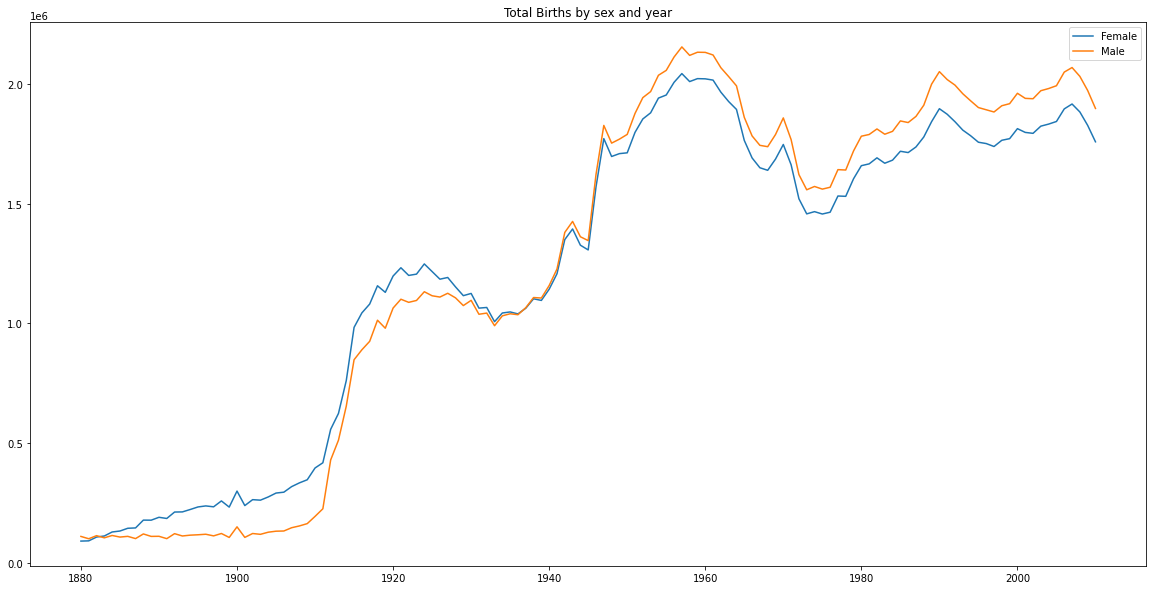

In [10]:
# 시계열 그래프 
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))

plt.plot(total_births)
plt.title('Total Births by sex and year')
plt.legend(labels = ['Female','Male'], loc = 'best')

* 각 이름이 전체 출생수에서 차지하는 비율을 계산 (prop)   
: 연도별로 그룹화 , 그룹별 births.sum , births / births.sum

In [11]:
# 그룹 객체에 prop 변수를 추가 
def add_prop(group) :
  group['prop'] = group.births / group.births.sum()
  return group

In [12]:
names = names.groupby(['year', 'sex'])

In [13]:
names = names.apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


* 년 별 이름 비율이 가장 높은 이름들 보고 싶음 .  
get records with max value for each group python : grouped.max()

In [14]:
names.groupby(['year', 'sex']).max() #loc[1880 :1890]

name  births      prop
year sex                             
1880 F         Zula    7065  0.077643
     M         Zeke    9655  0.087381
1881 F         Zula    6919  0.075243
     M          Zeb    8769  0.087039
1882 F         Zula    8149  0.075558
...             ...     ...       ...
2008 M      Zyshawn   22507  0.011075
2009 F    Zyrihanna   22222  0.012159
     M       Zyvion   21036  0.010660
2010 F      Zyyanna   22731  0.012923
     M        Zzyzx   21875  0.011523

[262 rows x 3 columns]

In [15]:
# 각 연도별/ 성별에 따른 선호하는 이름 1000개 추출하는 함수 
def get_top1000(group) : 
  return group.sort_values(by ='births', ascending =False)[:1000] 

In [16]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000
# 1880년 f 1000개 , M 1000개 

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [17]:
# 그룹 인덱스는 필요 없으므로 삭제 
# reset_index() : 행인덱스 초기화 정수형 위치인덱스로 ( 원래 인덱스는 행으로 )
top1000.reset_index(inplace =True ,drop =True)  # drop = T 원래 인덱스 행으로 넣지않음
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


* 함수 정의 없이 연도/ 성별 선호 1000개 이름 구하기  
for year, group in names.groupby(['year, 'sex']) :   # 그룹 객체에서 year 과 group df 추출하는 반복문  
group.sort_values(by =births, ascending =False)[:1000]

In [18]:
grouped = names.groupby(['year', 'sex'])
grouped.sort_values(by ='birth' ,ascending =False)[:1000] # 그룹 객체라서 sort_value 불가능한 문제 

AttributeError: ignored

In [19]:
pieces = []   # 빈리스트 
for year, group in names.groupby(['year', 'sex']) :
  pieces.append(group.sort_values(by ='births', ascending =False)[:1000]) 

In [20]:
len(pieces)

262

: pices 리스트 안의 원소는 각각 년별 출생수 상위 1000 묶음 데이터가 존재 . 

In [21]:
top1000 = pd.concat(pieces, ignore_index= True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


* 이름 유행 분석 : 년도별 이름의 추이 (john,mary)

In [22]:
# top1000 데이터 남녀 분리 : 불린인덱싱 
girls= top1000[top1000.sex == 'F']
boys = top1000[top1000.sex == 'M']

In [23]:
# 연도, 이름 별 총 츨생수 피벗 테이블 
total_births = pd.pivot_table(data = top1000 , 
                              index = 'year',
                              columns = 'name', # z칼럼이 너무 많을듯 
                              values = 'births',
                              aggfunc = 'sum')
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [24]:
# 몇몇 칼럼만 보고 싶을때 : subset 
subset = total_births[['John','Harry','Mary','Marilyn']]
subset

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN
...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0
2007,14405.0,443.0,3665.0,597.0
2008,13273.0,379.0,3478.0,543.0


In [ ]:
# 이름 추이 그래프 
fig = plt.figure(figsize = (20,20))
plt.plot(subset)
plt.legend(['John','Harry','Mary','Marilyn'])

* df.plot() : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f810d10ee10>,
      dtype=object)

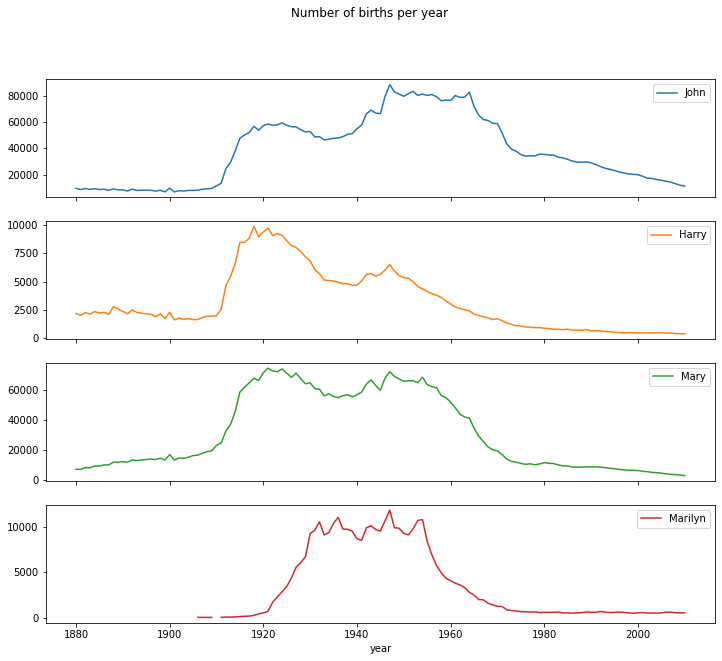

In [25]:
#df.plot( subplots = T : 각 칼럼 별 서브플랏 생성 )
subset.plot(subplots = True , figsize= (12,10), grid = False,
            title = 'Number of births per year')

: 최근 존, 해리 ,매리 ,마릴린 등의 흔한이름이 감소추세에 있음 . 
* 다양한 이름을 사용하는 경향 측정! - 각 이름의 비율 분포?  

In [26]:
# 인기있는 1000개의 이름이 전체에서 총 얼마나 차지하는가 
table = top1000.pivot_table(values = 'prop', index = 'year', columns = 'sex', aggfunc = sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


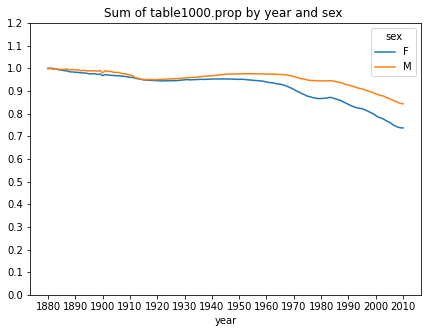

In [27]:
import numpy as np
table.plot(title = 'Sum of table1000.prop by year and sex ', figsize = (7,5),
           yticks = np.linspace(0, 1.2, 13) , xticks = range(1880, 2020 ,10))

* 인기있는 이름 순 정렬 , 누적 50%를 차지하는 이름수 확인   
 np.cumsum()

In [28]:
# 2010년 
df =boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [29]:
# df.prop 내림차순 정렬 , np.cumsum 사용 (누적합 )
df['cumsum'] = df.sort_values(by ='prop', ascending =False).prop.cumsum()
df['cumsum'][:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: cumsum, dtype: float64

In [ ]:
# 누적합이 0.5가 되는 위치 (인덱스)
df['cumsum'].searchsorted(0.5)

In [30]:
# 1900 년 
df =boys[boys.year == 1900]

in1900 = df.sort_values(by ="prop", ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5)

24

: 1900년도에는 상위 25개의 이름이 전체의 50% 차지 , 2010년에는 상위 117개의이름이 전체의 50%를차지  
-> 이름의 다양성이 늘어난 것 확인 가능 

* 각 연도별/성별 조합에 적용 :연도별/ 성별 상위 50%를 구성하는 이름의 수는 어떨까 


In [31]:
# 연도별/ 성별 상위 50%를 구성하는 이름의 수는 어떨까 
def get_quantile_count(group, q = 0.5): #그룹 객체 , 누적 0.5 
  group = group.sort_values(by ="prop", ascending = False)  # 그룹객체를 prop 내림차순 정렬
  return group.prop.cumsum().values.searchsorted(q) +1      # 누적합을 구하고 누적합 0.5가 되는 위치 인덱스 +1 : 이름수 


In [32]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [34]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [35]:
diversity = diversity.unstack()
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


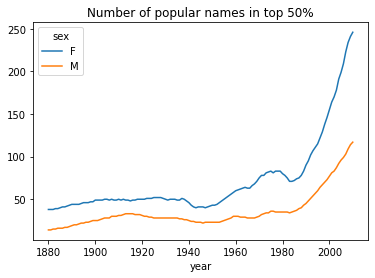

In [36]:
# 시계열 그래프 ㄱ 
diversity.plot(title = 'Number of popular names in top 50%')

* '마지막 글자'의 변화 : 남자아이 이름의 마지막 글자의 분포 변화

In [37]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [38]:
# name 칼럼에서 마지막 글자 추출
get_last_letter = lambda x : x[-1] 
last_letters = names['name'].map(get_last_letter)  # name 칼럼에 map함수 적용
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [39]:
last_letters.name = 'last_letter'

In [40]:
# 성별 ,년도별 마지막 알파벳 별 출생수 
table = names.pivot_table(values = 'births' , index =last_letters,
                          columns = ['sex', 'year'], aggfunc =sum)
table 
#칼럼수 너무많음

sex                F                    ...         M                    
year            1880     1881     1882  ...      2008      2009      2010
last_letter                             ...                              
a            31446.0  31581.0  36536.0  ...   32901.0   31430.0   28438.0
b                NaN      NaN      NaN  ...   39945.0   38862.0   38859.0
c                NaN      NaN      5.0  ...   25318.0   24048.0   23125.0
d              609.0    607.0    734.0  ...   47910.0   46172.0   44398.0
e            33378.0  34080.0  40399.0  ...  140966.0  135496.0  129012.0
f                NaN      NaN      NaN  ...    2195.0    2212.0    2255.0
g                7.0      5.0     12.0  ...    2059.0    2396.0    2666.0
h             4863.0   4784.0   5567.0  ...  100250.0   99979.0   98090.0
i               61.0     78.0     81.0  ...   38151.0   40912.0   42956.0
j                NaN      NaN      NaN  ...    1381.0    1416.0    1459.0
k               13.0     15.0     11.0  ...   39563.0   37507.0   35198.0
l             2541.0   2911.0   3527.0  ...  150791.0  143751.0  133583.0
m               58.0     57.0     81.0  ...   44316.0   46278.0   46808.0
n             3008.0   2959.0   3576.0  ...  733869.0  715388.0  688677.0
o               30.0     49.0     35.0  ...   91485.0   86423.0   81025.0
p                NaN      NaN      NaN  ...    2637.0    2595.0    2409.0
q                NaN      NaN      NaN  ...     339.0     377.0     342.0
r              481.0    417.0    590.0  ...  174632.0  173200.0  166064.0
s             1391.0   1316.0   1637.0  ...  137056.0  129861.0  123670.0
t             2152.0   2165.0   2399.0  ...   43846.0   43674.0   43398.0
u              380.0    427.0    410.0  ...    2405.0    2417.0    2318.0
v                NaN      NaN      NaN  ...    2418.0    2589.0    2723.0
w                NaN      5.0      NaN  ...   36937.0   33181.0   30656.0
x                NaN      NaN      NaN  ...   14834.0   16640.0   16352.0
y            10469.0  10404.0  12145.0  ...  122633.0  112922.0  110425.0
z              106.0     95.0    106.0  ...    3473.0    3633.0    3476.0

[26 rows x 262 columns]

In [41]:
# 필요한 칼럼만 추출 . year level 칼럼에서 세개의 년도만 추출
subtable = table.reindex(columns = [1910, 1960 ,2010], level = 'year')  
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

* 전체 출생 수에서 성별별 각각 마지막 글자가 차지하는 비율 계산   
: 정규화 -  알파벳이 차지하는 비율 / 년도별 출생 총합 

In [43]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [44]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

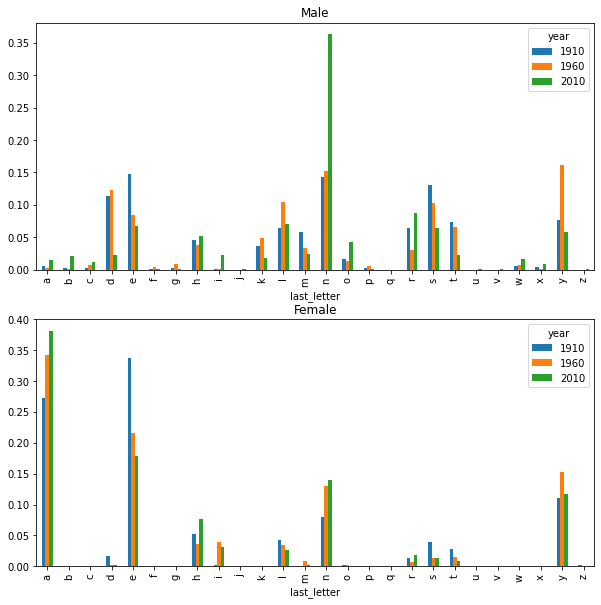

In [56]:
# 년도별 성별 마지막 글자 비율 막대그래프 
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1 ,figsize =(10,10)) # 2행 1열 fig
letter_prop['M'].plot(kind = 'bar', ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', ax = axes[1], title = 'Female')

In [57]:
# 전체 년도에서 정규화 
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d','n','y'] , 'M'].T  # 전치 
dny_ts

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
...,...,...,...
2006,0.025075,0.351666,0.060338
2007,0.024451,0.358274,0.059634
2008,0.023574,0.361101,0.060342


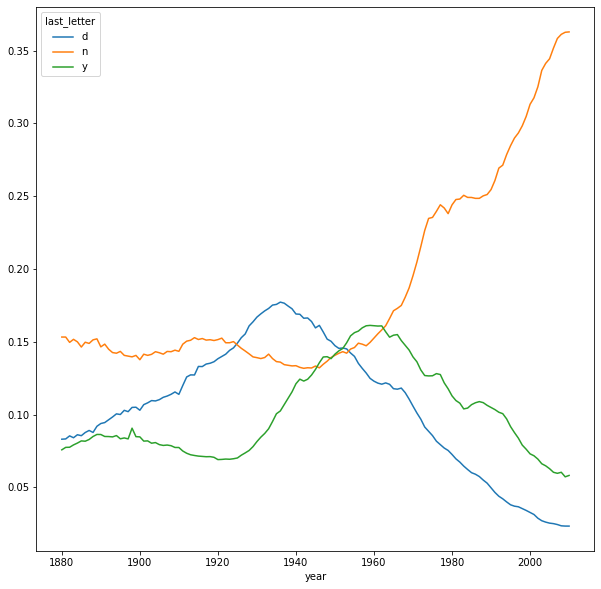

In [59]:
dny_ts.plot(figsize = (10,10))

* 남자이름과 여자이름이 바뀐 경우.   
: top1000  데이터를 이용해 'lesl'로 시작하는 이름을 포함하는 목록 생성 (startswith(), contains())

In [74]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [66]:
# 모든 이름들 
all_names = pd.Series(top1000['name'].unique())
all_names.count()

6868

In [73]:
# 소문자로 바꾼뒤 lesl로 시작하는 이름만 lesley_like
lesley_like = all_names[all_names.str.lower().str.startswith('lesl')] #.str.lower & .str.startswith
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

* 위 5개의 lesl 이름별 출생수와 상대도수 확인

In [76]:
# 불린인덱싱 , isin() 
filtered =top1000[top1000.name.isin(lesley_like)]
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


In [77]:
# 이름별 출생수 
filtered.groupby('name')['births'].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [79]:
# 성별 , 연도별 lesl 비슷한 이름 가진 아이  출생수 
table = filtered.pivot_table(values = 'births',
                             index ='year',
                             columns ='sex',
                             aggfunc = sum)
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [80]:
table.sum(1) # 년도별합

year
1880      87.0
1881     103.0
1882     137.0
1883     132.0
1884     140.0
         ...  
2006    4166.0
2007    3805.0
2008    3022.0
2009    2573.0
2010    2060.0
Length: 131, dtype: float64

In [81]:
table = table.div(table.sum(1), axis = 0 ) 
# table 데이터 을 년도별 합 기준으로 나눔 . axis = 0 열 우선 계산 
table 

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


* 년도별 lesley와 비슷한 이름을 가진 사람들의 남녀 비율 1880 F + 1880 M = 100

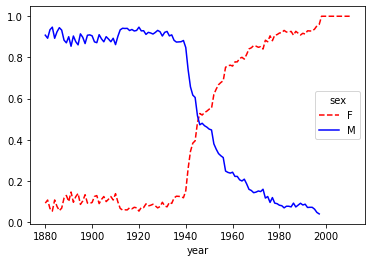

In [84]:
table.plot(style = {'M' : 'b-' , 'F' : 'r--'}) # Male은 실선, Female은 점선

linestyle)
 - : line , -- :dashed , -. : dashdot , o : circle marker   
colorstyle)   
k = black , w= white , b = blue ,r = red